In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [11]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
y_test = y_test.reshape(-1)

In [20]:
classes = ['airplane', 'automobile', 'cat', 'bird','deer','dog','frog','horse', 'sheep','truck']

In [23]:
def plot_sample (x,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

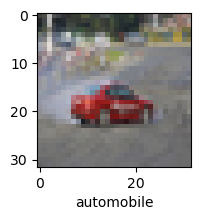

In [26]:
plot_sample(x_train, y_train,75)

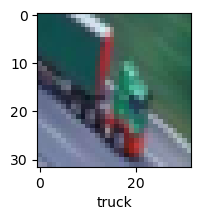

In [56]:
plot_sample(x_train, y_train,50)

In [57]:
#normaliing
x_train= x_train/255.0
x_test = x_test/255.0

In [30]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = 'relu'),           
    layers.Dense(1000,activation = 'relu'), 
    layers.Dense(10,activation = 'softmax'),
                    ])
ann.compile(optimizer = 'SGD', 
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(x_train , y_train, epochs=5)

C:\Users\Saron\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.3040 - loss: 1.9324
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4176 - loss: 1.6423
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4541 - loss: 1.5553
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4738 - loss: 1.4948
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.4985 - loss: 1.4288


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.49      0.64      0.56      1000
           1       0.52      0.71      0.60      1000
           2       0.44      0.23      0.30      1000
           3       0.44      0.12      0.19      1000
           4       0.41      0.37      0.39      1000
           5       0.44      0.30      0.36      1000
           6       0.57      0.47      0.51      1000
           7       0.30      0.82      0.44      1000
           8       0.80      0.29      0.43      1000
           9       0.54      0.55      0.55      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



In [34]:
import seaborn as sns

In [ ]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, anot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [42]:
from tensorflow.keras import layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [45]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [47]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.3755 - loss: 1.7111
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5910 - loss: 1.1696
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6408 - loss: 1.0341
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6755 - loss: 0.9331
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6972 - loss: 0.8739
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7146 - loss: 0.8178
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7378 - loss: 0.7549
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7488 - loss: 0.7276
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7656 - loss: 0.6779
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7726 - loss: 0.6517


In [48]:
cnn.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6985 - loss: 0.9123


[0.9205738306045532, 0.6970999836921692]

In [49]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[9.2443090e-04, 1.0201319e-03, 5.6837020e-03, 9.1648334e-01,
        1.2344639e-03, 3.9426990e-02, 1.8333452e-02, 9.9322438e-05,
        1.6449466e-02, 3.4471080e-04],
       [1.3559801e-02, 7.0310697e-02, 9.4687575e-06, 7.4098085e-07,
        2.0785089e-06, 2.3612220e-07, 5.3165565e-09, 6.8227212e-07,
        9.1015494e-01, 5.9613576e-03],
       [1.2632814e-01, 3.4862572e-01, 4.3274751e-03, 3.0245180e-03,
        3.0948373e-03, 6.7917933e-04, 1.2773735e-04, 4.2202105e-04,
        4.2895299e-01, 8.4417298e-02],
       [9.0144092e-01, 1.2099808e-02, 8.8060098e-03, 3.8937973e-03,
        4.3711890e-03, 3.2531153e-04, 1.8133398e-03, 5.4231065e-04,
        6.5570697e-02, 1.1367678e-03],
       [6.4008595e-06, 2.2646827e-04, 3.7212905e-02, 7.1355268e-02,
        2.4124822e-02, 3.8450141e-03, 8.6314762e-01, 2.6348232e-06,
        6.9552050e-05, 9.3755043e-06]], dtype=float32)

In [50]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [51]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

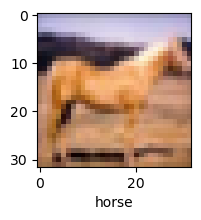

In [54]:
plot_sample(x_test, y_test, 700)

In [55]:
classes[y_classes[700]]

'horse'